# Analysis of SEIRX model runs for vaccination prevalence

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import analysis_functions as af

In [49]:
language = 'german'
vaccination_ratios = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

## Mappings of variables to plot labels

In [50]:
# English
if language == 'english':
    metric_name_map = {'infected_residents_mean':'follow-up cases residents (mean)',
                       'infected_residents_median':'follow-up cases residends (median)',
                       'infected_residents_0.90':'follow-up cases residents (90th percentile)',
                       'R0_mean':'$R_0$',
                       'R0_mean':'$R_0$'}

    index_case_map = {'employee':'index case employee',
                      'resident':'index case resident'}
    xlabel = 'vaccinated employees'
    ylabel = 'vaccinated residents'

# German
if language == 'german':
    metric_name_map = {'infected_residents_mean':'Folgefälle BewohnerInnen (Mittelwert)',
                       'infected_residents_median':'Folgefälle BewohnerInnen (Median)',
                       'infected_residents_0.90':'Folgefälle BewohnerInnen (90. Percentile)',
                       'R0_mean':'$R_0$',
                       'R0_mean':'$R_0$'}

    index_case_map = {'employee':'Indexfall MitarbeiterIn',
                      'resident':'Indexfall BewohnerIn'}
    xlabel = 'geimpfte MitarbeiterInnen'
    ylabel = 'geimpfte BewohnerInnen'


## Analysis wild type

### Data loading and wrangling

In [51]:
res_path = '../data/simulation_results'
dst_path = '../plots'
N_runs = 1000
sim_name = 'simulations_vaccination_rate_{}.csv'.format(N_runs)

In [52]:
data = pd.read_csv(join(res_path, sim_name))

data = data.set_index(['index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio'])

### Plot

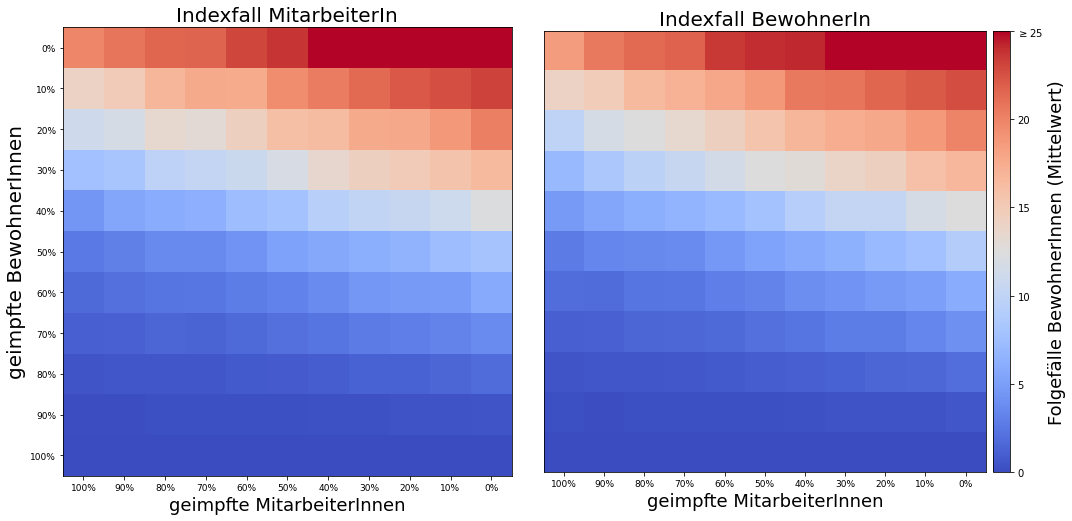

In [53]:
metric = 'infected_residents_mean'

# figure layout & axis setup
fig, axes = plt.subplots(1, 2, figsize=(15, 9))

vmin=0
vmax=25
vstep=5

# compare scenarios in which either employees or residents are the index case
for i, index_case_mode, ax in zip([0, 1], ['employee', 'resident'], axes):
    
    ax.set_title(index_case_map[index_case_mode], fontsize=20)
        
    # set flag to set axis ticks only for heatmaps at the boundaries of 
    # the figure
    xticks = True
    yticks = False
    if i == 0:
        yticks = True

    # plot heatmap of the scenario
    img = af.get_image(data, index_case_mode, vaccination_ratios, metric)
    if index_case_mode == 'resident':
        # if a resident is the index case, we need to subtract 1 from the
        # number of infected residents, to calculate the "outbreak size",
        # which is defined as the number of FOLLOW-UP cases, given an index
        # case
        img = img - 1
    img_plot = af.plot_heatmap(ax, img,
            ['{:1.0f}%'.format(100*i) for i in vaccination_ratios],
            vmin, vmax, xticks, yticks, xlabel, ylabel)
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(20)
        
# colorbar
divider = make_axes_locatable(axes[1])
cbar_ax = divider.append_axes('right', size='4%', pad=0.1)

norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
sm = plt.cm.ScalarMappable(cmap= plt.get_cmap('coolwarm'), norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical',\
                        ticks=np.arange(vmin, vmax + 1, vstep))
yticklabels = list(range(vmin, vmax, vstep)) + ['$\geq {}$'.format(vmax)]
cbar.ax.set_yticklabels(yticklabels)
cbar.set_label('{}'.format(metric_name_map[metric]), fontsize=18)      

# dummy axis to preserve spacing
divider = make_axes_locatable(axes[0])
cbar_ax = divider.append_axes('right', size='4%', pad=0.0)
cbar_ax.set_axis_off()

plt.tight_layout()

plt.savefig('../plots/vaccinations_{}.pdf'.format(language[0:3]))
plt.savefig('../plots/vaccinations_{}.png'.format(language[0:3]))

## Analysis B.1.1.7

### Data loading and wrangling

In [47]:
res_path = '../data/simulation_results'
dst_path = '../plots'
N_runs = 1000
sim_name = 'simulations_vaccination_rate_{}_UK_variant.csv'.format(N_runs)

In [45]:
data = pd.read_csv(join(res_path, sim_name))

data = data.set_index(['index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio'])

### Plot

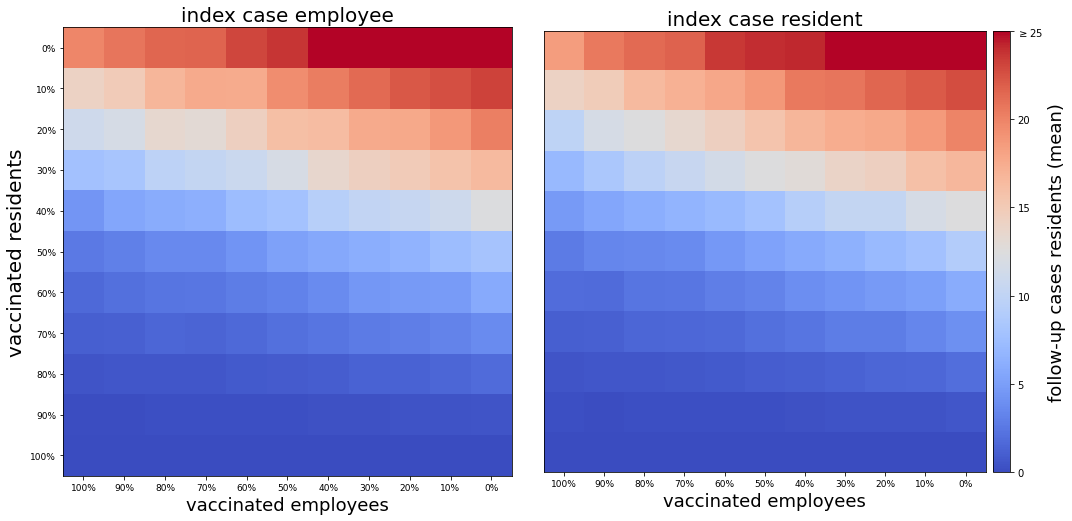

In [46]:
metric = 'infected_residents_mean'

# figure layout & axis setup
fig, axes = plt.subplots(1, 2, figsize=(15, 9))

vmin=0
vmax=25
vstep=5

# compare scenarios in which either employees or residents are the index case
for i, index_case_mode, ax in zip([0, 1], ['employee', 'resident'], axes):
    
    ax.set_title(index_case_map[index_case_mode], fontsize=20)
        
    # set flag to set axis ticks only for heatmaps at the boundaries of 
    # the figure
    xticks = True
    yticks = False
    if i == 0:
        yticks = True

    # plot heatmap of the scenario
    img = af.get_image(data, index_case_mode, vaccination_ratios, metric)
    if index_case_mode == 'resident':
        # if a resident is the index case, we need to subtract 1 from the
        # number of infected residents, to calculate the "outbreak size",
        # which is defined as the number of FOLLOW-UP cases, given an index
        # case
        img = img - 1
    img_plot = af.plot_heatmap(ax, img,
            ['{:1.0f}%'.format(100*i) for i in vaccination_ratios],
            vmin, vmax, xticks, yticks, xlabel, ylabel)
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(20)
        
# colorbar
divider = make_axes_locatable(axes[1])
cbar_ax = divider.append_axes('right', size='4%', pad=0.1)

norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
sm = plt.cm.ScalarMappable(cmap= plt.get_cmap('coolwarm'), norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical',\
                        ticks=np.arange(vmin, vmax + 1, vstep))
yticklabels = list(range(vmin, vmax, vstep)) + ['$\geq {}$'.format(vmax)]
cbar.ax.set_yticklabels(yticklabels)
cbar.set_label('{}'.format(metric_name_map[metric]), fontsize=18)      

# dummy axis to preserve spacing
divider = make_axes_locatable(axes[0])
cbar_ax = divider.append_axes('right', size='4%', pad=0.0)
cbar_ax.set_axis_off()

plt.tight_layout()

plt.savefig('../plots/vaccinations_UK_variant_{}.pdf'.format(language))
plt.savefig('../plots/vaccinations_UK_variant_{}.png'.format(language))